# Домашее задание 2
* Загрузите изображение и переведите его в цветовое пространство HSV

*   Настройте цветовой фильтр на лежащих на поле роботов. Скорее всего маска получится изрядно зашумленной. Удалите шум с помощью морфологических операций, выводя все промежуточные этапы на экран. Морфологических операций на самом деле много, рекомендуем к чтению документацию https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html


*  Удалите шум с помощью фильтрации связных компонент, пользуясь указаниями в первом ответе по ссылке https://stackoverflow.com/questions/35854197/how-to-use-opencvs-connectedcomponentswithstats-in-python

После выполнения закоммитьте задание в ветку cv_hw в своем репозитории.

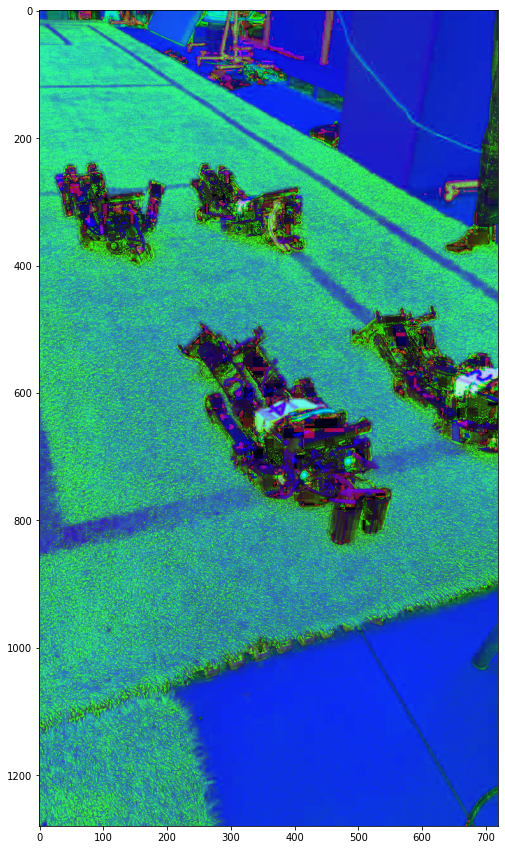

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
import math
%matplotlib inline
from ipywidgets import interactive
 

ax=18
ay=15
kernel = np.ones((3,3),np.uint8)

canvas = cv2.imread('/sahrs_on_the_field.jpg')
 #Преобразуем в HSV
img = cv2.cvtColor(canvas, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(ax, ay))
plt.imshow(img)
plt.show()


In [15]:
def f(rl, gl, bl, rh, gh, bh):
  mask = cv2.inRange(img, (rl, gl, bl), (rh, gh, bh))
  plt.figure (figsize=(12, 10))
  plt.imshow (mask, cmap="gray")
  plt.show ()
  plt.pause (0.05)
  plt.clf ()
 
interactive_plot = interactive(f, rl = (0, 255, 1), gl = (0, 255, 1), bl = (0, 255, 1),
                                  rh = (0, 255, 1), gh = (0, 255, 1), bh = (0, 255, 1))
 
output = interactive_plot.children[-1]
interact(f, rl = (0, 255, 1), gl = (0, 255, 1), bl = (0, 255, 1),
                                  rh = (0, 255, 1), gh = (0, 255, 1), bh = (0, 255, 1))

interactive(children=(IntSlider(value=127, description='rl', max=255), IntSlider(value=127, description='gl', …

<function __main__.f>

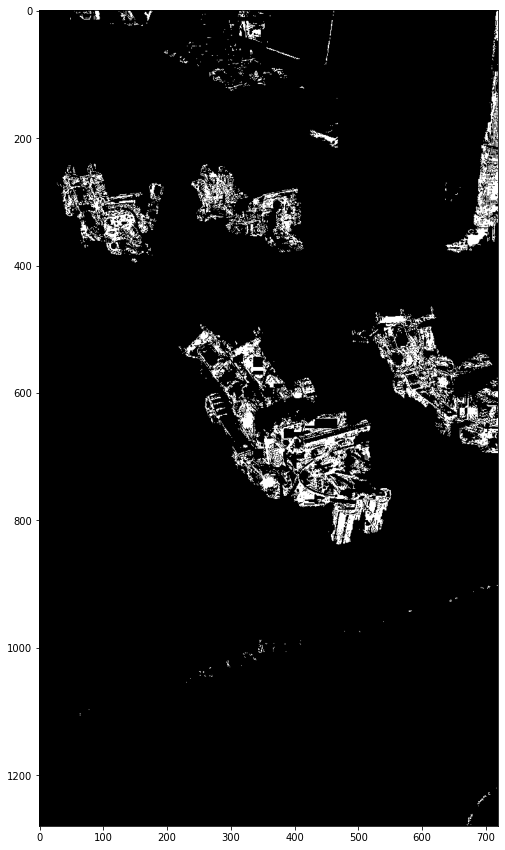

In [14]:

im1 = cv2.inRange(img, (5, 5, 5), (240, 65, 65))

plt.figure(figsize=(ax, ay))
plt.imshow(im1, cmap="gray")
plt.show()

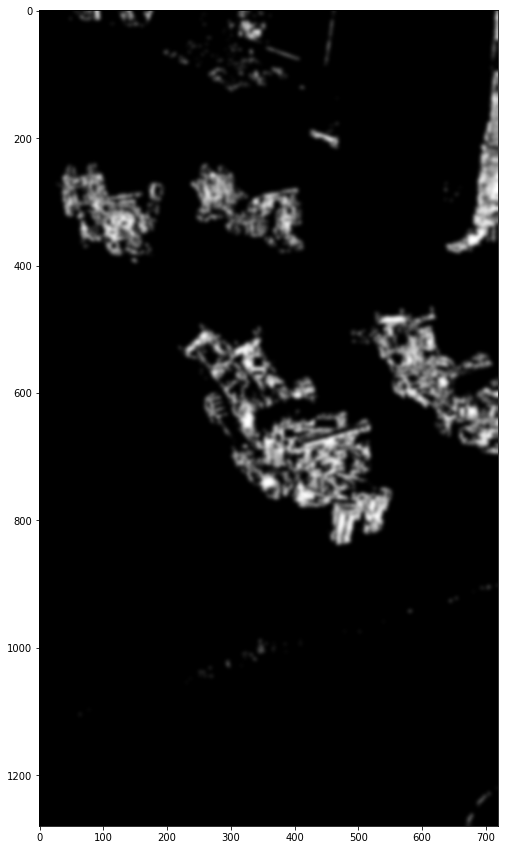

In [16]:
blur = cv2.GaussianBlur(im1, (45,45), 3)
plt.figure(figsize=(ax, ay))
plt.imshow(blur, cmap="gray")
plt.show()


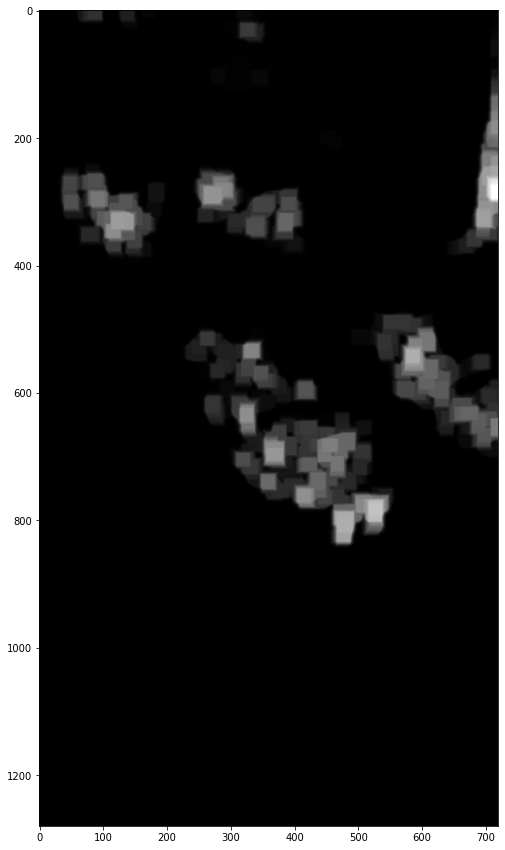

In [32]:
kernel1 = np.ones((20,20),np.uint8)

opening = cv2.morphologyEx(blur, cv2.MORPH_OPEN, kernel1)
plt.figure(figsize=(ax, ay))
plt.imshow(opening, cmap="gray")
plt.show()

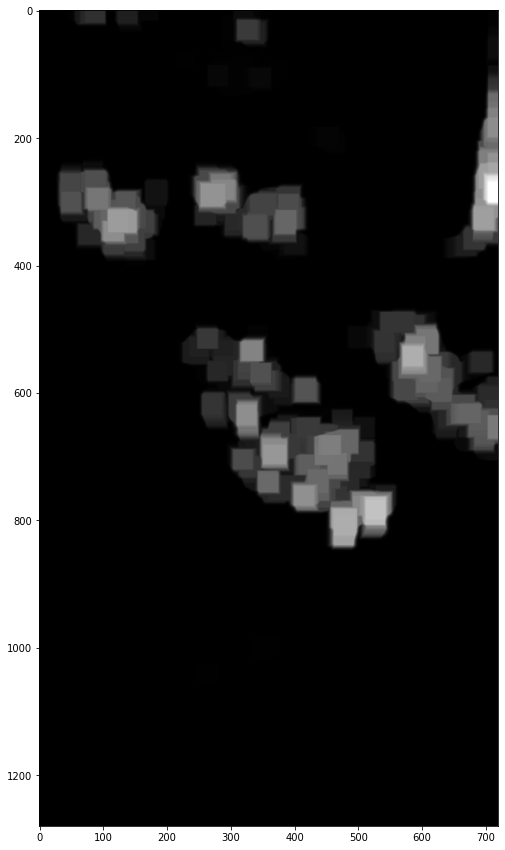

In [33]:
dilation = cv2.dilate(opening,kernel,iterations =5)
plt.figure(figsize=(ax, ay))
plt.imshow(dilation, cmap="gray")
plt.show()

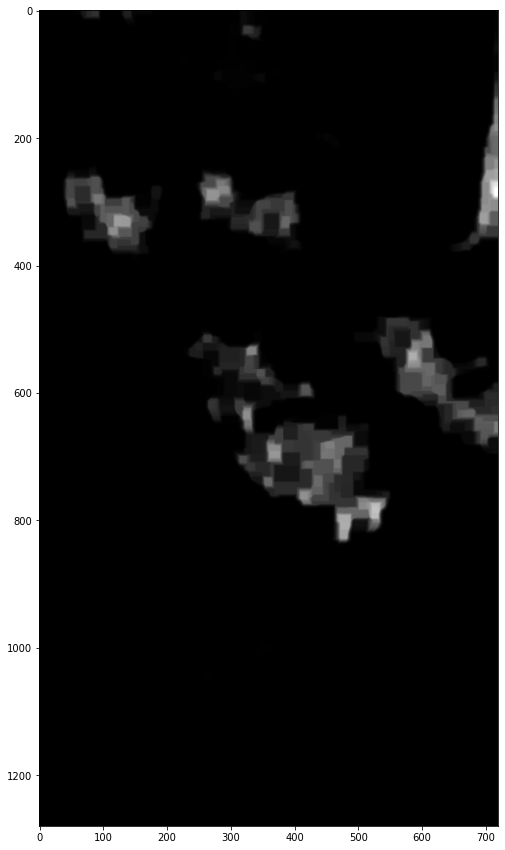

In [34]:
erosion = cv2.erode( dilation,kernel,iterations = 10)
plt.figure(figsize=(ax, ay))
plt.imshow(erosion, cmap="gray")
plt.show()

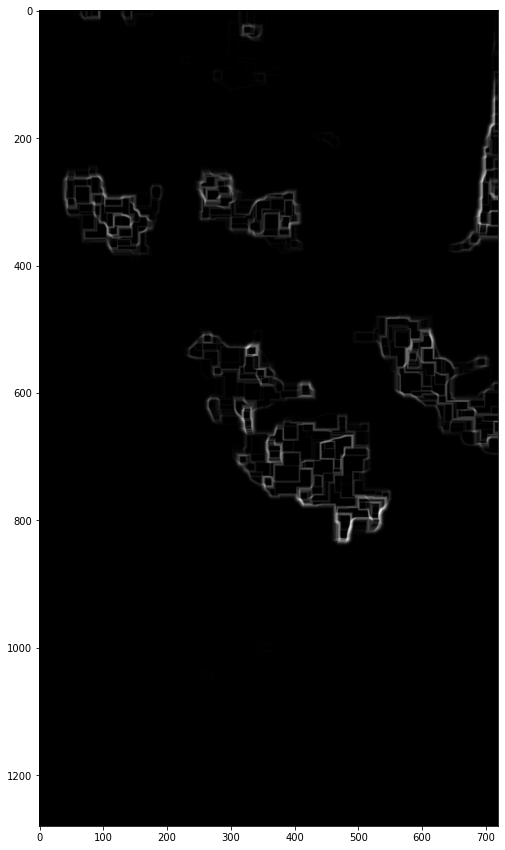

In [35]:
gradient = cv2.morphologyEx(erosion, cv2.MORPH_GRADIENT, kernel)
plt.figure(figsize=(ax, ay))
plt.imshow(gradient, cmap="gray")
plt.show()

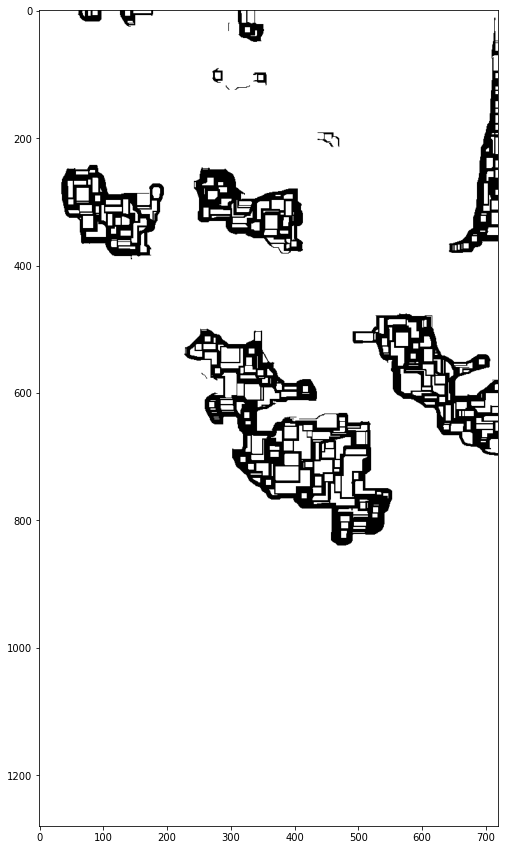

In [36]:
thresh = cv2.threshold(gradient, 1, 255, cv2.THRESH_BINARY_INV)[1]
contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
plt.figure(figsize=(ax, ay))
plt.imshow(thresh, cmap="gray")

350
646


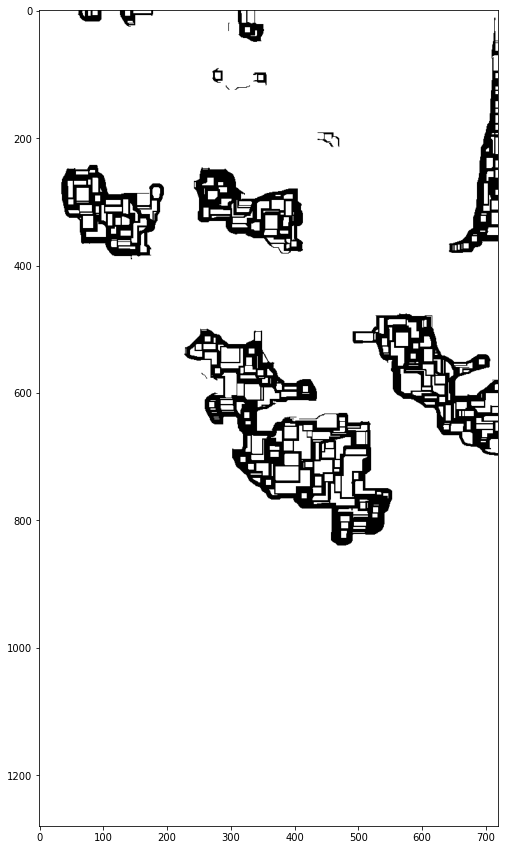

In [37]:
mainContour = max(contours, key = cv2.contourArea)
M = cv2.moments(mainContour)
if M['m00'] != 0:
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    print(cx)
    print(cy)

plt.figure(figsize=(ax, ay))
plt.imshow(thresh, cmap="gray")

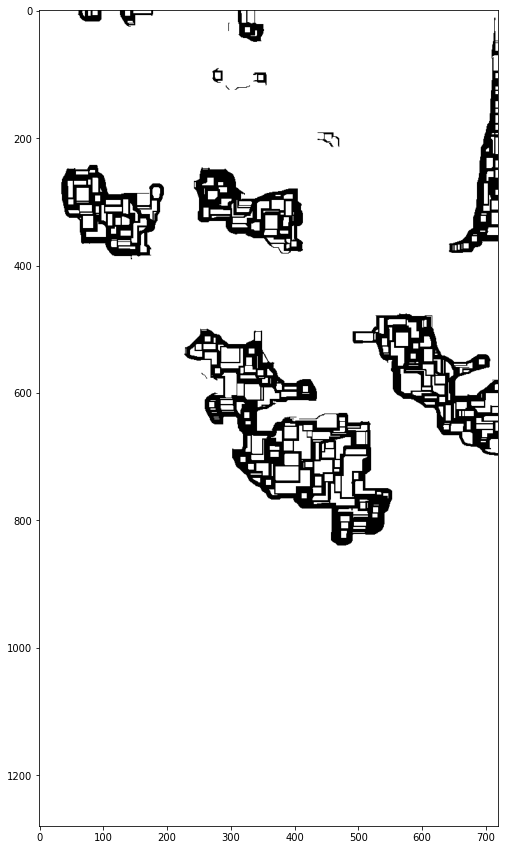

In [38]:
im= cv2.fillPoly(thresh, contours, 255)
plt.figure(figsize=(ax, ay))
plt.imshow(im, cmap="gray")
plt.show()

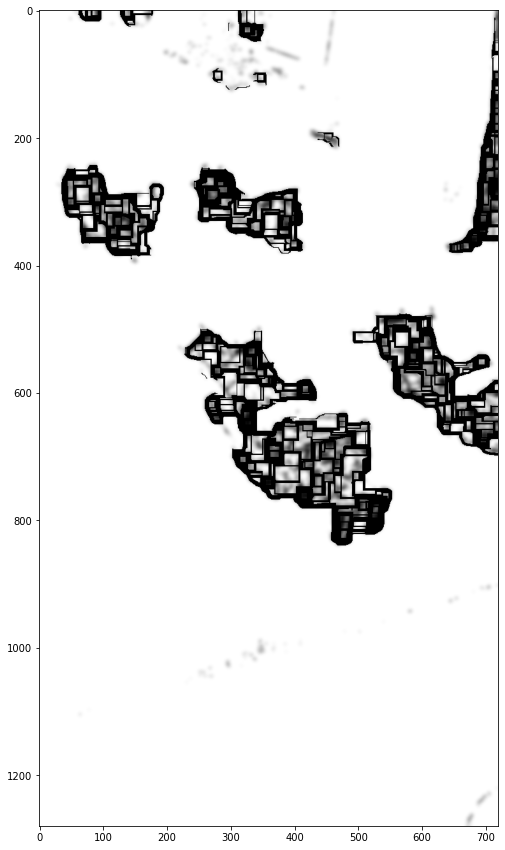

In [39]:
image9=cv2.subtract(im,blur)
plt.figure(figsize=(ax, ay))
plt.imshow(image9, cmap="gray")
plt.show()

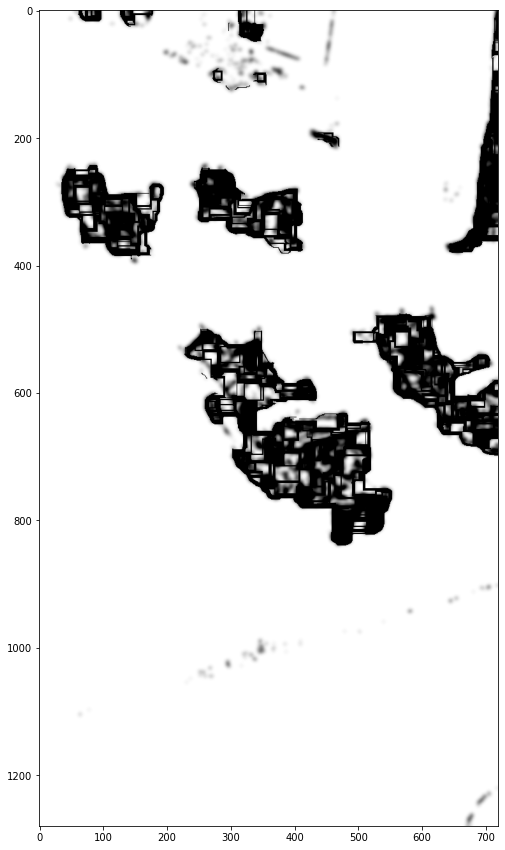

In [40]:
image10 =cv2.subtract(image9,blur)
plt.figure(figsize=(ax, ay))
plt.imshow(image10, cmap="gray")
plt.show()

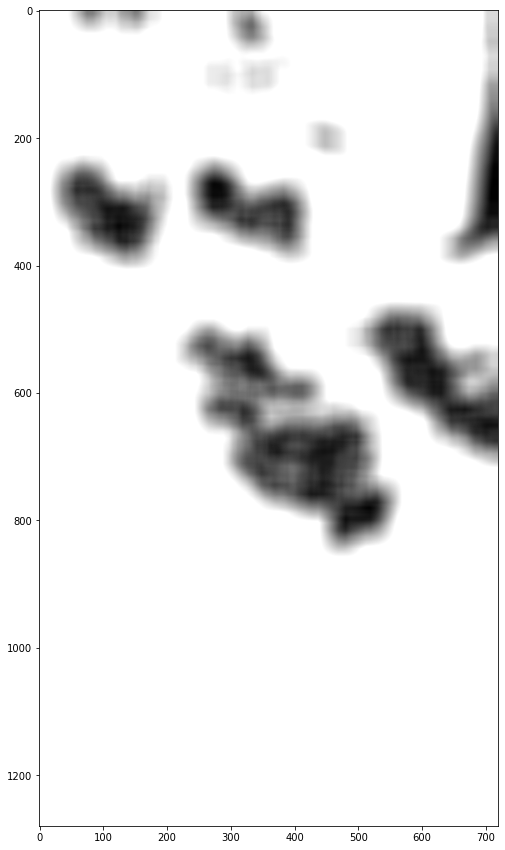

In [42]:
blur2 = cv2.GaussianBlur(image10, (45,45), 200)
plt.figure(figsize=(ax, ay))
plt.imshow(blur2, cmap="gray")
plt.show()